In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url =  "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

In [13]:
cities = []

while len(cities)<500:
    x = (random.choice(range(-90,90))) 
    y = (random.choice(range(-180,180))) 
    city = citipy.nearest_city(x,y).city_name 
    if city not in cities:
        cities.append(city)

In [14]:
count = 1
name = []
country = []
city_id = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []

for city in cities:
    query_url = f'{url}q={city}&units={unit}&APPID={weather_api_key}'
    response = requests.get(query_url)
    try:
        response = response.json()
        print(f'{count} City: {city} City Number: {response["id"]}')
        name.append(response["name"])
        country.append(response["sys"]["country"])
        city_id.append(response["id"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
    except Exception as e:
        print(f'{count} Error for City: {city}')
    
    count = count+1        

1 City: ilulissat City Number: 3423146
2 City: bathsheba City Number: 3374083
3 City: punta arenas City Number: 3874787
4 City: kapaa City Number: 5848280
5 City: tuktoyaktuk City Number: 6170031
6 City: ushuaia City Number: 3833367
7 City: aklavik City Number: 5882953
8 City: east london City Number: 1006984
9 City: kiama City Number: 2161515
10 City: ribeira grande City Number: 3372707
11 City: buta City Number: 217570
12 City: hermanus City Number: 3366880
13 City: kahului City Number: 5847411
14 City: sault sainte marie City Number: 6141439
15 City: busselton City Number: 2075265
16 City: leh City Number: 1264976
17 City: teotitlan City Number: 3801145
18 City: albany City Number: 5106841
19 City: lebu City Number: 3883457
20 City: bredasdorp City Number: 1015776
21 City: grenville City Number: 3580236
22 City: soligalich City Number: 491025
23 City: atuona City Number: 4020109
24 City: sitka City Number: 5557293
25 City: lavrentiya City Number: 4031637
26 City: hilo City Number: 5

In [15]:
weather_df = pd.DataFrame({"City": name,
                        "Country": country,
                       "City Number": city_id,
                       "Latitude": lat,
                       "Longitude": long,
                       "Temperature (F)": temp,                    
                        "Humidity (%)": humid, 
                        "Cloudiness (%)": cloud,
                       "Wind Speed (mph)": wind})

In [16]:
weather_df

,City,Country,City Number,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ilulissat,GL,3423146,69.22,-51.10,5.00,45,0,17.22
1,Bathsheba,BB,3374083,13.22,-59.52,77.00,94,20,9.17
2,Punta Arenas,CL,3874787,-53.15,-70.92,46.40,65,75,29.97
3,Kapaa,US,5848280,22.08,-159.32,81.01,69,75,11.41
4,Tuktoyaktuk,CA,6170031,69.45,-133.04,14.00,85,90,28.86
...,...,...,...,...,...,...,...,...,...
453,Kiboga,UG,231550,0.92,31.77,61.79,98,0,1.92
454,Neiafu,TO,4032420,-18.65,-173.98,82.40,74,20,9.17
455,Manacapuru,BR,3663529,-3.30,-60.62,80.60,88,20,3.69
456,Yeppoon,AU,2142316,-23.13,150.73,89.60,52,40,5.82


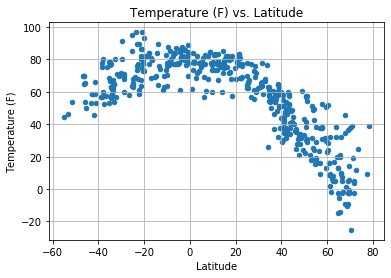

In [17]:
weather_df.plot(kind="scatter", x="Latitude", y="Temperature (F)", title= "Temperature (F) vs. Latitude", grid="True")
plt.savefig("TempatureVsLatitude")

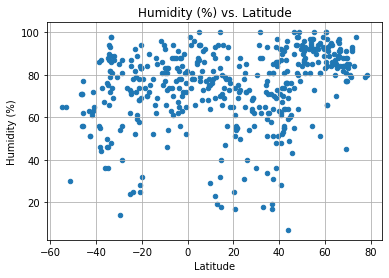

In [18]:
weather_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", title= "Humidity (%) vs. Latitude", grid="True")
plt.savefig("HumidityVsLatitude")

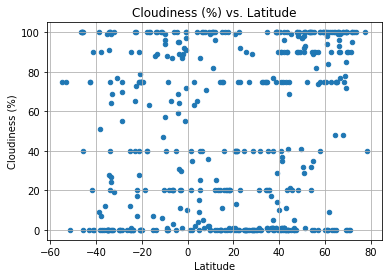

In [19]:
weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", title= "Cloudiness (%) vs. Latitude", grid="True")
plt.savefig("CloudinessVsLatitude")

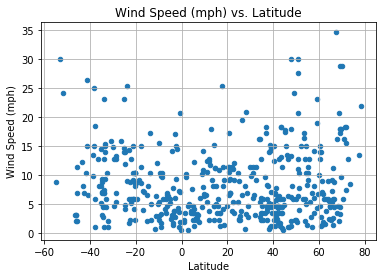

In [20]:
weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", title= "Wind Speed (mph) vs. Latitude", grid="True")
plt.savefig("WindSpeedVsLatitude")

In [21]:
n_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
s_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]

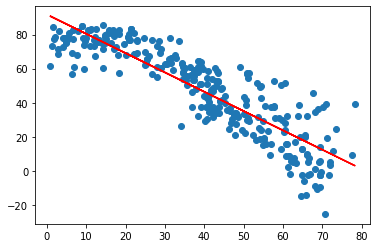

In [22]:
n_x_values = n_hemisphere["Latitude"]
nt_y_values = n_hemisphere["Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, nt_y_values)
regress_values = n_x_values * slope + intercept
plt.scatter(n_x_values, nt_y_values)
plt.plot(n_x_values,regress_values,"r-")

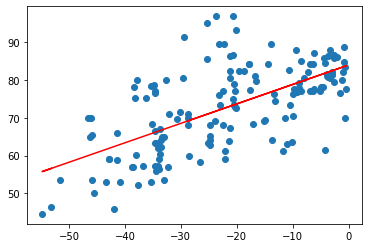

In [23]:
s_x_values = s_hemisphere["Latitude"]
st_y_values = s_hemisphere["Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, st_y_values)
regress_values = s_x_values * slope + intercept
plt.scatter(s_x_values,st_y_values)
plt.plot(s_x_values,regress_values,"r-")

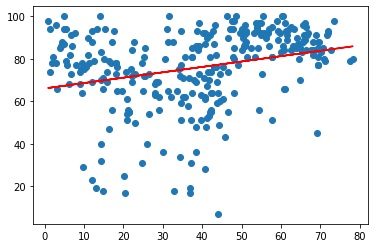

In [24]:
n_x_values = n_hemisphere["Latitude"]
nh_y_values = n_hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, nh_y_values)
regress_values = n_x_values * slope + intercept
plt.scatter(n_x_values, nh_y_values)
plt.plot(n_x_values,regress_values,"r-")

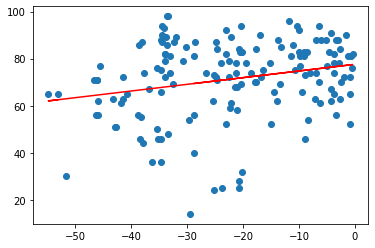

In [25]:
s_x_values = s_hemisphere["Latitude"]
sh_y_values = s_hemisphere["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, sh_y_values)
regress_values = s_x_values * slope + intercept
plt.scatter(s_x_values,sh_y_values)
plt.plot(s_x_values,regress_values,"r-")

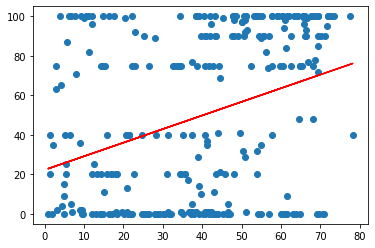

In [26]:
n_x_values = n_hemisphere["Latitude"]
nc_y_values = n_hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, nc_y_values)
regress_values = n_x_values * slope + intercept
plt.scatter(n_x_values, nc_y_values)
plt.plot(n_x_values,regress_values,"r-")

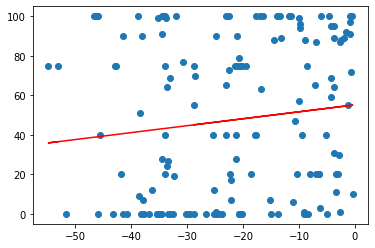

In [27]:
s_x_values = s_hemisphere["Latitude"]
sc_y_values = s_hemisphere["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, sc_y_values)
regress_values = s_x_values * slope + intercept
plt.scatter(s_x_values,sc_y_values)
plt.plot(s_x_values,regress_values,"r-")

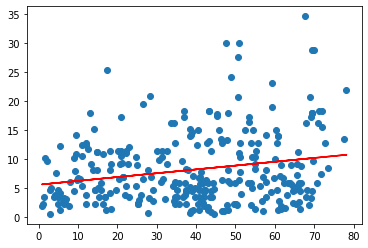

In [28]:
n_x_values = n_hemisphere["Latitude"]
nw_y_values = n_hemisphere["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, nw_y_values)
regress_values = n_x_values * slope + intercept
plt.scatter(n_x_values, nw_y_values)
plt.plot(n_x_values,regress_values,"r-")

In [29]:
weather_csv = weather_df.to_csv("Weather.csv", index=False)